# Лабораторна робота №4. Розв’язування задачі лінійної регресії

In [1]:
# Імпортування бібліотек
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [3]:
# Завантаження набору даних
power = pd.read_csv("Datasets/PV_Elec_Gas3.csv")
power

,date,Cumulative_solar_power,kWh electricity/day,Gas/day
0,26/10/2011,0.1,15.1,9.0
1,27/10/2011,10.2,7.4,9.2
2,28/10/2011,20.2,5.8,8.0
3,29/10/2011,29.6,4.9,6.6
4,30/10/2011,34.2,11.7,5.3
...,...,...,...,...
3299,6/11/2020,36445.0,16.0,11.0
3300,7/11/2020,36453.0,13.0,13.0
3301,8/11/2020,36461.0,12.0,11.0
3302,9/11/2020,36466.0,14.0,10.0


In [4]:
# Замінення назв колонок набору даних для зручності
power.rename(columns={"Cumulative_solar_power": "Solar_power",
                      "kWh electricity/day": "Electricity_day",
                      "date":"Date", 
                      "Gas/day":"Gas_day"},inplace=True)

In [5]:
power

,Date,Solar_power,Electricity_day,Gas_day
0,26/10/2011,0.1,15.1,9.0
1,27/10/2011,10.2,7.4,9.2
2,28/10/2011,20.2,5.8,8.0
3,29/10/2011,29.6,4.9,6.6
4,30/10/2011,34.2,11.7,5.3
...,...,...,...,...
3299,6/11/2020,36445.0,16.0,11.0
3300,7/11/2020,36453.0,13.0,13.0
3301,8/11/2020,36461.0,12.0,11.0
3302,9/11/2020,36466.0,14.0,10.0


In [6]:
# Додавання додаткового стовпця для зручності у роботі з лінійною регресією 
power["Day_number"] = range(1, len(power) + 1)
power

,Date,Solar_power,Electricity_day,Gas_day,Day_number
0,26/10/2011,0.1,15.1,9.0,1
1,27/10/2011,10.2,7.4,9.2,2
2,28/10/2011,20.2,5.8,8.0,3
3,29/10/2011,29.6,4.9,6.6,4
4,30/10/2011,34.2,11.7,5.3,5
...,...,...,...,...,...
3299,6/11/2020,36445.0,16.0,11.0,3300
3300,7/11/2020,36453.0,13.0,13.0,3301
3301,8/11/2020,36461.0,12.0,11.0,3302
3302,9/11/2020,36466.0,14.0,10.0,3303


In [7]:
# Створення піднабору для розв'язання задачі лінійної регресії
subpower = power[["Day_number", "Solar_power"]]

### Математична модель рівння лінійної регресії

Модель простої лінійної регресії описує залежність між змінними "Day_number" (незалежна змінна) 
та "Solar_power" (залежна змінна) за формулою:


y' = f(x)

де:
- x  — вхідні дані (незалежна змінна),
- y' — прогнозоване значення залежної змінної,
- f — модель прогнозування (функція прямої).

Математично лінійну регресію можна подати як рівняння прямої:

y = kx + b


де:
-  k  — коефіцієнт нахилу (показує, як швидко змінюється y при зміні x ,
-  b — вільний член (значення  y , коли  x = 0).

In [8]:
subpower.head()

,Day_number,Solar_power
0,1,0.1
1,2,10.2
2,3,20.2
3,4,29.6
4,5,34.2


In [9]:
subpower.tail()

,Day_number,Solar_power
3299,3300,36445.0
3300,3301,36453.0
3301,3302,36461.0
3302,3303,36466.0
3303,3304,36469.0


In [10]:
subpower.shape

(3304, 2)

In [11]:
subpower.info

<bound method DataFrame.info of       Day_number  Solar_power
0              1          0.1
1              2         10.2
2              3         20.2
3              4         29.6
4              5         34.2
...          ...          ...
3299        3300      36445.0
3300        3301      36453.0
3301        3302      36461.0
3302        3303      36466.0
3303        3304      36469.0

[3304 rows x 2 columns]>

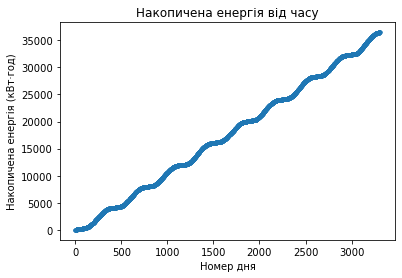

In [12]:
plt.scatter(subpower["Day_number"], subpower["Solar_power"], s=10)
plt.title("Накопичена енергія від часу")
plt.xlabel("Номер дня")
plt.ylabel("Накопичена енергія (кВт·год)")
plt.show()

In [13]:
# Перетворення даних у придатний формат
X = subpower["Day_number"].values.reshape(-1, 1)
Y = subpower["Solar_power"].values.reshape(-1, 1)

In [14]:
subpower["Day_number"].head(10)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Day_number, dtype: int32

In [15]:
X[0:10]

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [16]:
# Розбиття даних на тренувальну та тестову вибірки
X_train,X_cv, y_train, y_cv = train_test_split(X,Y,test_size=0.3, random_state=143)

In [17]:
# Створення та навчання моделі
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [18]:
# Перевріка роботи моделі на заданій множині 
X_sample = X_train[:5]
y_true = y_train[:5]
y_pred = lin_reg.predict(X_sample)
print("Прогноз:", y_pred)
print("Реальні дані:", y_true)

Прогноз: [[14680.6655627 ]
 [ 9228.55124016]
 [17484.29345621]
 [12198.4021313 ]
 [19933.31228808]]
Реальні дані: [[15170.]
 [ 8708.]
 [16992.]
 [11984.]
 [20017.]]


In [19]:
# Розрахунок кореня із середньоквадратичної похибки 
predictions = lin_reg.predict(X_train)
mse = mean_squared_error(y_train, predictions)
rmse = np.sqrt(mse)
rmse

409.3033143585032

In [20]:
# Розрахунок відносної похибки роботи моделі у відсотках
max_value = y_train.max()         
percent_error = (rmse / max_value) * 100
print(f"Відносна похибка RMSE: {percent_error:.2f}%")

Відносна похибка RMSE: 1.12%


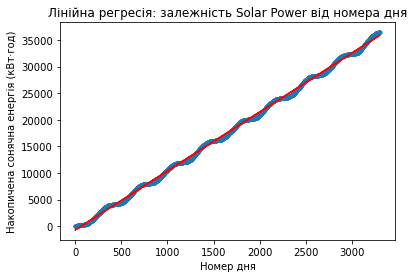

In [21]:
# Додавання лінії регресії на графік
plt.scatter(X_train, y_train, s=10)
plt.plot(X_train, predictions, color='red')
plt.title("Лінійна регресія: залежність Solar Power від номера дня")
plt.xlabel("Номер дня")
plt.ylabel("Накопичена сонячна енергія (кВт·год)")
plt.show()

In [22]:
# Середньоквадратична похибка на тестових даних
cv_predictions = lin_reg.predict(X_cv)
cv_mse = mean_squared_error(y_cv, cv_predictions)
cv_rmse = np.sqrt(cv_mse)
cv_rmse

403.3414156668857

In [23]:
# Розрахунок відносної похибки роботи моделі на тестових даних у відсотках
max_value_test = y_cv.max()
percent_error_test = (cv_rmse / max_value_test) * 100
print(f"Відносна похибка RMSE (тестові дані): {percent_error_test:.2f}%")

Відносна похибка RMSE (тестові дані): 1.11%


In [24]:
# Перетворення даних у придатний формат
X_test = subpower["Day_number"].values.reshape(-1, 1)
y_test = subpower["Solar_power"].values.reshape(-1, 1)

In [25]:
# Оцінка остаточної точності моделі лінійної регресії на всьому наборі даних
final_predictions = lin_reg.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

407.5224636488535

In [26]:
max_value_full = y_test.max()
percent_error_full = (final_rmse / max_value_full) * 100
print(f"Відносна похибка RMSE (повний набір даних): {percent_error_full:.2f}%")

Відносна похибка RMSE (повний набір даних): 1.12%


In [27]:
score=r2_score(y_test, final_predictions)
score

0.998515102269527

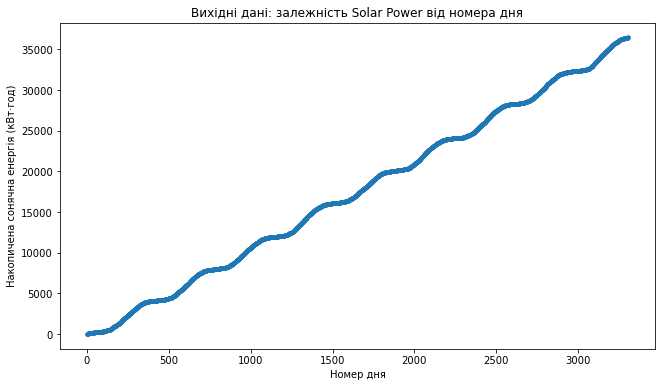

In [28]:
plt.figure(figsize=(10.66,6))
plt.scatter(subpower["Day_number"], subpower["Solar_power"], s=10)
plt.title("Вихідні дані: залежність Solar Power від номера дня")
plt.xlabel("Номер дня")
plt.ylabel("Накопичена сонячна енергія (кВт·год)")
plt.show()

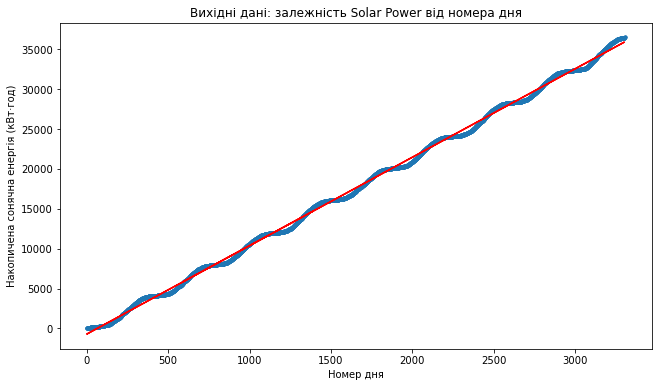

In [29]:
plt.figure(figsize=(10.6,6))
plt.scatter(subpower["Day_number"], subpower["Solar_power"], s=10)
plt.plot(X_train, predictions, color='red')
plt.title("Вихідні дані: залежність Solar Power від номера дня")
plt.xlabel("Номер дня")
plt.ylabel("Накопичена сонячна енергія (кВт·год)")
plt.show()

In [30]:
day = int(input("Введіть номер дня для прогнозу: "))
predicted_power = lin_reg.predict([[day]])
print(f"Прогнозована енергія на {day}-й день: {predicted_power[0][0]:.2f} кВт·год")

Введіть номер дня для прогнозу: 3200
Прогнозована енергія на 3200-й день: 34760.40 кВт·год
